In [3]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [4]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
file_path = Path("Titanic-Dataset.csv")
Titanic_data = pd.read_csv(file_path)

# Review the DataFrame
Titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
#Making a copy
Titanic_data=Titanic_data.dropna().copy() # making sure we work on a copy

# Encoding categoirical variables
categorical_column=['Name','Sex','Ticket']
categorical_existing_column=[col
                             for col in categorical_column
                             if col in Titanic_data.columns]

# LabelEncoder() converts categorical variables into numbers

encoders={} # Encoders to resuse for predictions
for col in categorical_existing_column:
    le=LabelEncoder()
    Titanic_data[col]=le.fit_transform(Titanic_data[col].astype(str))
    encoders[col]=le # it saves encoder

In [40]:
# This step scaling numemerical feature

numerical_column=['PassengerId', 'Survived' , ' Pclass', 'Age', 'Sibsp', 'Parch']
categorical_existing_column

['Name', 'Sex', 'Ticket']

In [41]:
# Recognize numerical columns (Budget, Duration, etc.)

#  Scaling of numerical features
numerical_column = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch']
existing_numerical_column = [col 
                               for col in numerical_cols 
                               if col in Titanic_data.columns]

#When no numerical column exists the scaler will be set to none
if existing_numerical_column:
        scaler = MinMaxScaler() # use of MinMaxScaler() to make the date normal between 0 and 1
        Titanic_data[existing_numerical_column] = scaler.fit_transform(Titanic_data[existing_numerical_column])
else:
        scaler = None  # No scaling if no numerical columns exist

# Save encoders & scaler for reuse in predictions
#Saves categorical encoders (label_encoders.pkl) for reuse during predictions.
# Saves the numerical scaler (scaler.pkl) so the test data can be transformed in the same way
    
with open("label_encoders.pkl", "wb") as f:
        pickle.dump(encoders, f)

if scaler:
        with open("scaler.pkl", "wb") as f:
            pickle.dump(scaler, f)

print(" Preprocessing completed successfully.")

 Preprocessing completed successfully.


In [42]:
# Now lets divide or separte the data into
#y variable, the label
y=Titanic_data["Embarked"]

#X variable, the fearure
X=Titanic_data.drop(columns=["Embarked"])

In [43]:
y.head()

1     C
3     S
6     S
10    S
11    S
Name: Embarked, dtype: object

In [44]:
X.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
1,0.000000,1.0,0.0,49,0,0.468892,0.333333,0.00,109,71.2833,C85
3,0.002252,1.0,0.0,70,0,0.430956,0.333333,0.00,31,53.1000,C123
6,0.005631,0.0,0.0,112,1,0.671219,0.000000,0.00,55,51.8625,E46
10,0.010135,1.0,1.0,148,0,0.038948,0.333333,0.25,120,16.7000,G6
11,0.011261,1.0,0.0,27,0,0.721801,0.000000,0.00,26,26.5500,C103


In [45]:
# Import train_test_learn module
from sklearn.model_selection import train_test_split

#Now lets divide or split the data 
Size_Test= 0.25 # 25% data for testing
State_Random= 1 # Making sure the reproductibility 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Printing results to verify the split of data
print(f"Training features shape (y_train): {y_train.shape}")
print(f"Testing features shape (y_test): {y_test.shape}")
print(f"Training features shape(X_train): {X_train.shape}")
print(f"Training features shape (X_test): {X_test.shape}")

Training features shape (y_train): (137,)
Testing features shape (y_test): (46,)
Training features shape(X_train): (137, 11)
Training features shape (X_test): (46, 11)


In [46]:
#Dropping non relavent columns
Titanic_data= Titanic_data.drop(columns=['PassengerId','Name','Ticket', 'Cabin'], errors='ignore')                                   

In [47]:
X= Titanic_data.drop(columns=['Survived']) #Features
y= Titanic_data['Survived'] # Target

In [48]:
X=X.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True) # Fill any remaining Nan with 0

In [49]:
from sklearn.linear_model import LogisticRegression

#Split traing and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#Logistic Regression Model
logistic_model= LogisticRegression(random_state=1, max_iter=500)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=1)

In [50]:
# Make a prediction using the testing data
# Step 2: Make predictions using the testing data
y_pred = logistic_model.predict(X_test)
y_pred[:10]

array([1., 1., 1., 0., 0., 0., 1., 1., 1., 0.])

In [51]:
# Generate a confusion matrix for the model
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 9  5]
 [ 5 18]]


In [52]:
from sklearn.metrics import classification_report
import IPython
# Print the classification report for the model
class_report = classification_report(y_test, y_pred)
# Generate the classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert the report dictionary to a DataFrame
class_report_df = pd.DataFrame(report_dict).transpose()
print("                  Classification Report")
IPython.display.display(class_report_df)

                  Classification Report


,precision,recall,f1-score,support
0.0,0.642857,0.642857,0.642857,14.00000
1.0,0.782609,0.782609,0.782609,23.00000
accuracy,0.729730,0.729730,0.729730,0.72973
macro avg,0.712733,0.712733,0.712733,37.00000
weighted avg,0.729730,0.729730,0.729730,37.00000


In [6]:
Titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Bar Plot (Survival of Average Passennger By Age) 

Text(0.5, 1.0, 'Survival of Average Passennger By Age')

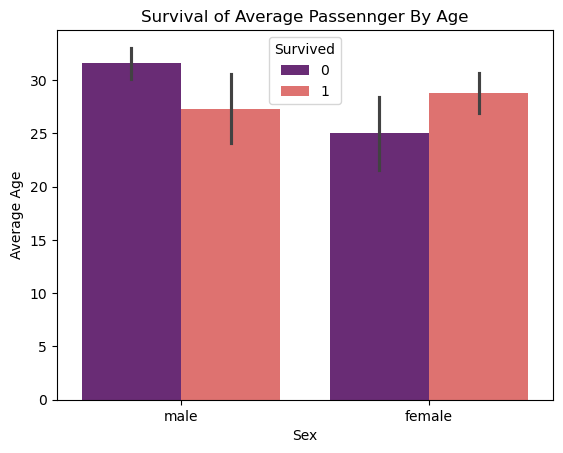

In [98]:
import seaborn as sns
sns.barplot(x=Titanic_data["Sex"],
            y=Titanic_data["Age"],
            hue=Titanic_data["Survived"],
            palette='magma', 
            estimator=np.mean)
plt.ylabel("Average Age")
plt.title("Survival of Passennger By Gender & Average Age")

This shows that passenger survival rate by average age & gender.That shows that age & gender did impact the survial rate.0 is no and 1 is yes. As we can see the men survival rate is lower than women. This could be as female and younger passengers were proirtized during evacuation process.

## Bar Plot (Survival Rate Based on Gender)

C:\Users\riffa\AppData\Local\Temp\ipykernel_10840\3733842908.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Titanic_data.reset_index(), x="Sex", y="Survived", palette="coolwarm")


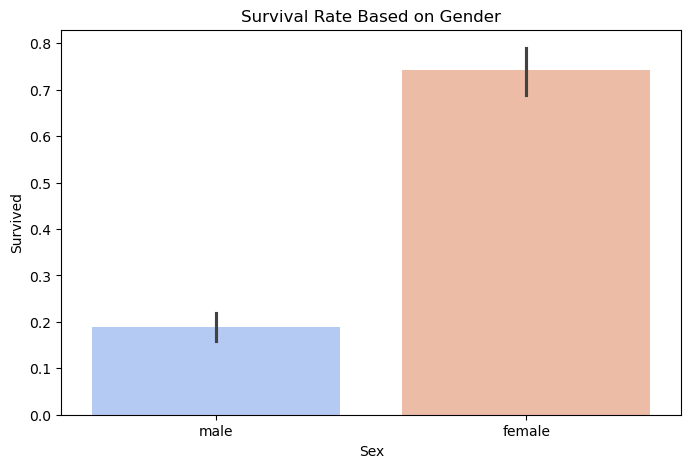

In [77]:
plt.figure(figsize=(8, 5))
sns.barplot(data=Titanic_data.reset_index(), 
            x="Sex", 
            y="Survived", 
            palette="coolwarm")
plt.xlabel("Sex")
plt.ylabel("Survived")
plt.title("Survival Rate Based on Gender")
#plt.savefig("Survival Rate Based on Gender.png") # Save as PNG
plt.show()

In [ ]:
In this barchart we only compared the gender to see the survival rate and clearly female bar is higher shows that more women were survived than men.

## Survial Analysis Pie Chart (Overall)

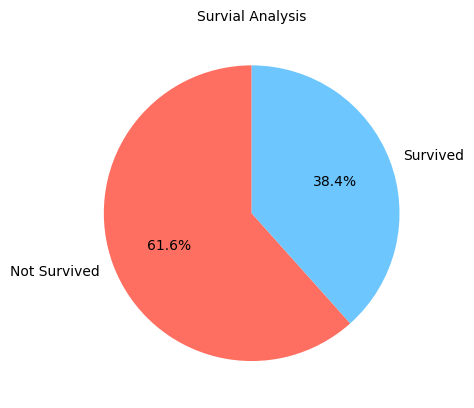

In [99]:
Titanic_data['Survived'].value_counts().plot(
    kind='pie',
    labels=['Not Survived', 'Survived'],
    colors=['#ff6f61', '#6ec6ff'],
    autopct='%.1f%%',
    startangle=90
)
plt.title("Survial Analysis", fontsize=10)
plt.ylabel('')
plt.show()